In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [19]:
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
## generate a no skill prediction (majority class)

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
model =LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
model_prob = model.predict_proba(X_test)

In [24]:
# Lets focus on positive outcome
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [25]:
model_prob = model_prob[:,1]

In [26]:
## Lets calculate the scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [31]:
## Claculate Roc Curve
dummy_fpr, dummy_tpr, _= roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

C:\Users\ACER\AppData\Local\Temp\ipykernel_18660\3870111851.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


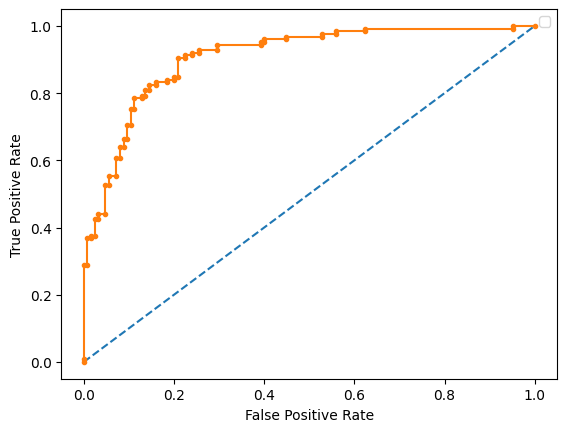

In [32]:
## Plot the roc curve for the model

pyplot.plot(dummy_fpr,dummy_tpr, linestyle='--')
pyplot.plot(model_fpr, model_tpr, marker='.')

pyplot.xlabel("False Positive Rate")
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

AttributeError: 'numpy.float64' object has no attribute 'xyz'

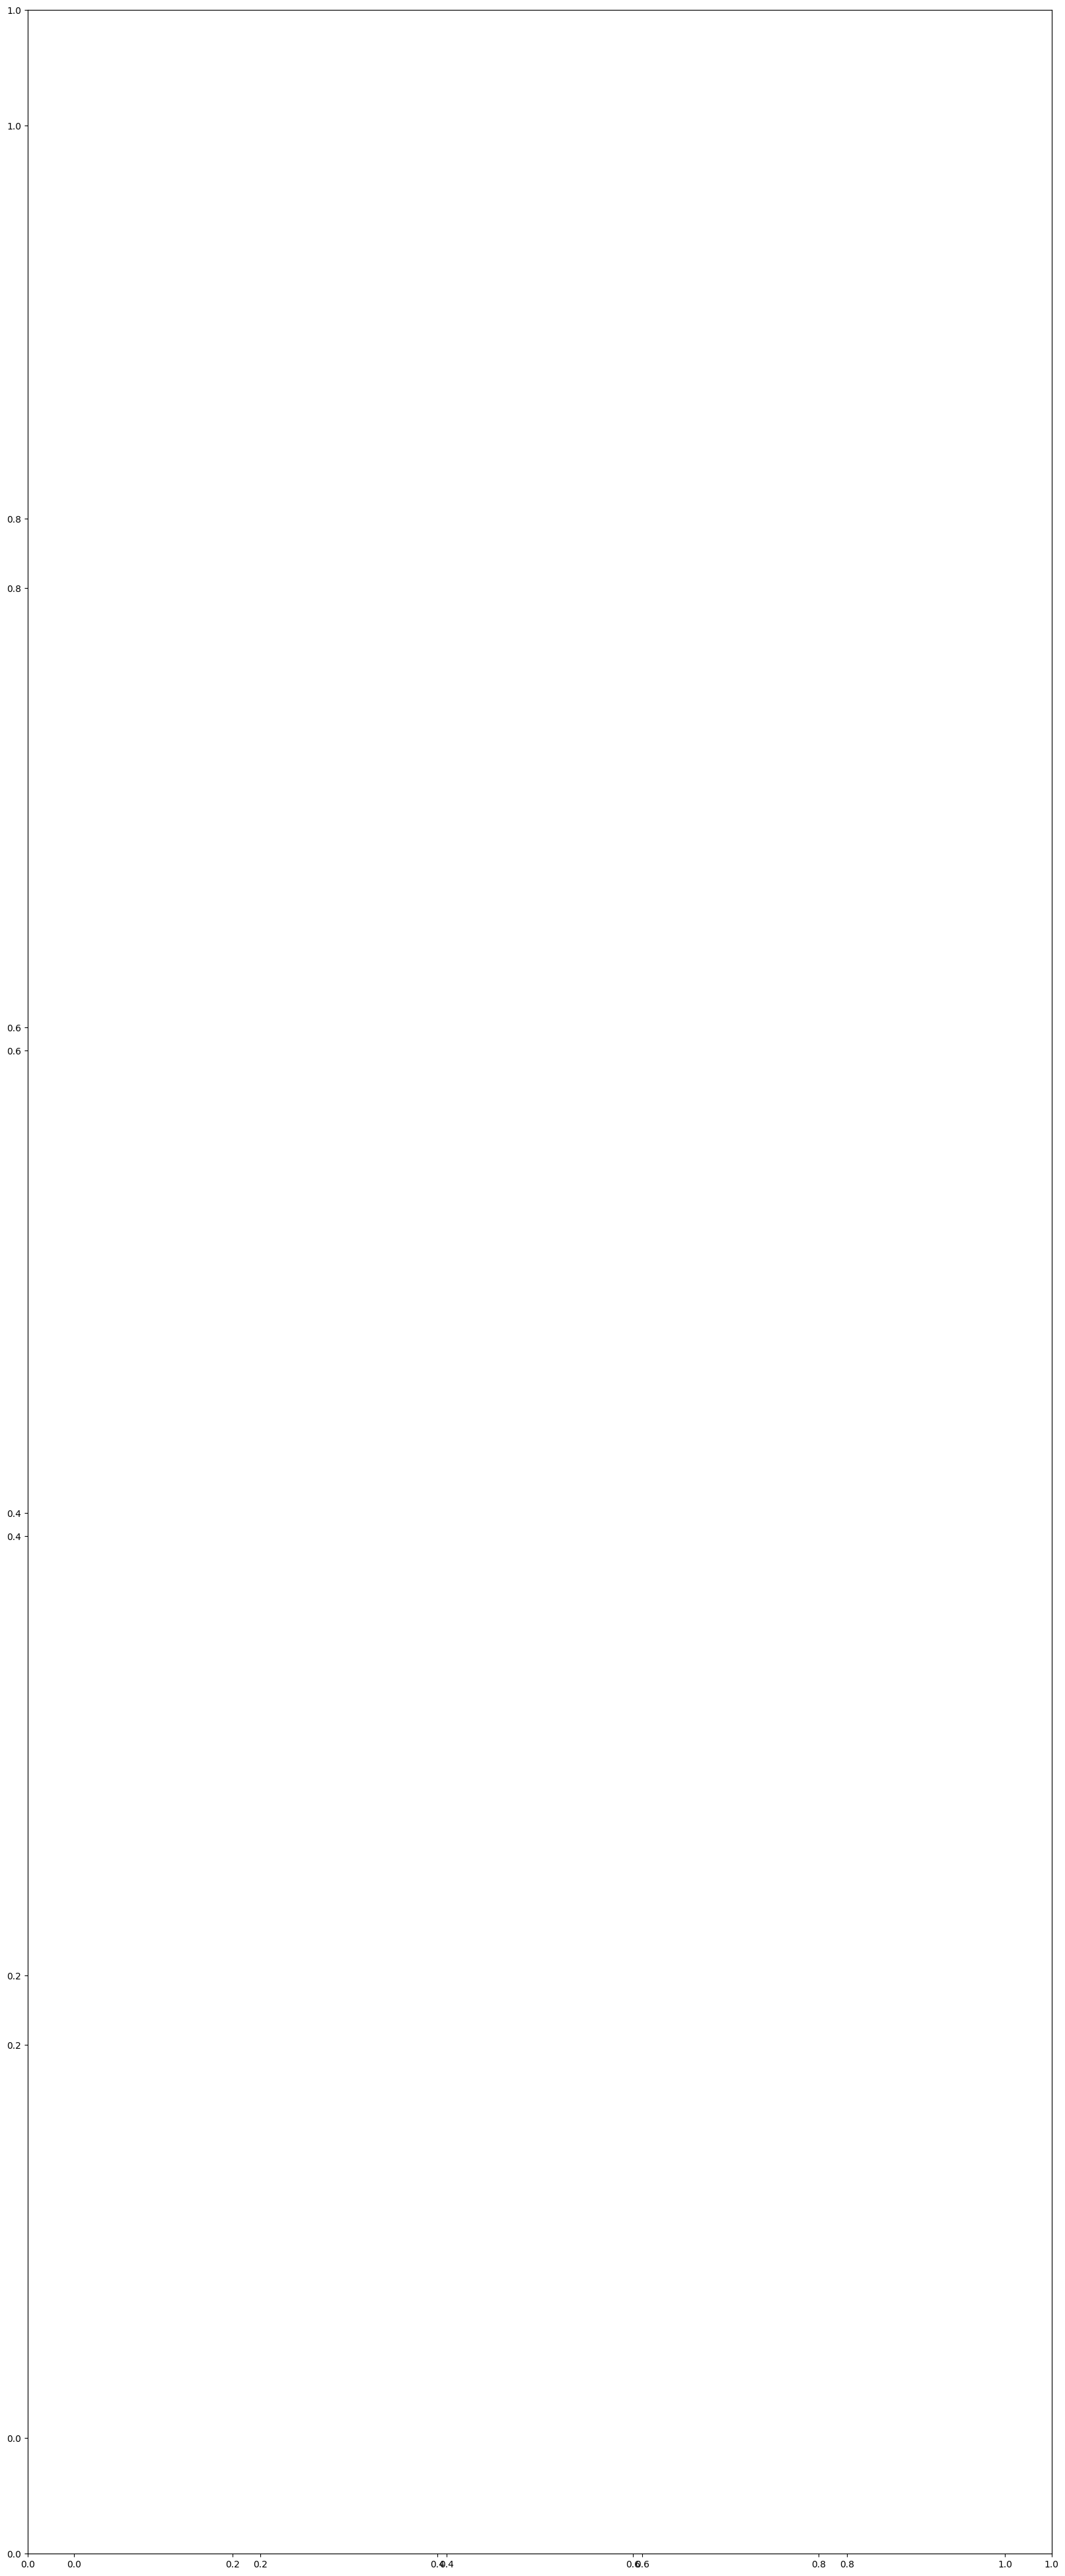

In [33]:
# plot the roc curve for the model
import numpy as np
fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--')
pyplot.plot(model_fpr,model_tpr, marker='.')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0].xyz[1]))

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()